# 패키지 설치

In [ ]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install git+https://github.com/ssut/py-hanspell.git
!pip install konlpy

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-jjonkubj
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-jjonkubj
     |████████████████████████████████| 454.4 MB 9.3 kB/s 
     |████████████████████████████████| 1.2 MB 31.5 MB/s 
     |████████████████████████████████| 4.0 MB 53.3 MB/s 
     |████████████████████████████████| 462 kB 60.3 MB/s 
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2255829 sha256=60c00919c9efd3b7bd9cfb4194eceaaacbe2d1752d26cc3c94c9e1f5eab1c8b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-h_zvw590/wheels/9b/93/81/a2a7dc8c66ede5bf30634d20635f32b95eac7ca2ea8844058b
Successfully built pykospacing
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.39.0
    Uninstalling grpcio-1.39.0:
      Successfully uninstalled grpcio-1.39.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-uomvz8cj
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-uomvz8cj
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=21d9a4157cd200ae895d8fbe4c4a1e31f0d239b8afbb457f49767591a48105dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-hfwl8orm/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell
     |████████████████████████████████| 19.4 MB 5.2 MB/s 
     |████████████████████████████████| 448 kB 67.5 MB/s 
     |████████████████████████████████| 86 kB 4.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# 라이브러리 임포트

In [ ]:
import pandas as pd
from tqdm.auto import tqdm
import re
import matplotlib.pyplot as plt

#교정 라이브러리
from pykospacing import Spacing #띄어쓰기
from hanspell import spell_checker #맞춤법

# 토크나이져
from konlpy.tag import Okt

# 데이터 확인

In [ ]:
# 데이터 경로 PATH 지정
df = pd.read_excel(PATH)

# 데이터 확인을 위해 1차 단순 긍/부정 + 중립 분류

In [ ]:
df = df[['발화','최종분류(우선순위 가장 높은것 선택)']]

## 텍스트 전처리

In [ ]:
# 한글 영문만 남기고 모두 제거하는 코드
def preprocessing(text):
    # 특수문자나 이모티콘 등 아래의 특수기호들을 제거합니다(%등은 남김).
    text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 위에서 특수문자를 제거한 text에서 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    return text

In [ ]:
def clean_text(text):
    text = re.sub('http[s]?://\S+', '', text) # http url 제거
    text = re.sub('\S*@\S*\s?', '', text) # 기자 emails 제거
    text = re.sub(r'\[.*?\]', '', text) # 대괄호안에 텍스트 제거 : 뉴스이름 + 기자이름
    text = re.sub(r'\w*\d\w*', '', text) # 숫자 포함하는 텍스트 제거
    text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)#특수문자 이모티콘 제거
    text = re.sub("\n", '', text) #개행문자 제거
    text = re.sub("\xa0", '', text) #개행문자 제거
    text = re.sub(r'Copyright .* rights reserved', '', text) # "Copyright all rights reserved" 제거
    return text

In [ ]:
def correcting (df,col):
  spacing = Spacing()
  
  for i in tqdm(range(len(df))):
      df.loc[i,col] = spacing(df.loc[i,col])

  for i in tqdm(range(len(df))):
      sent = df.loc[i,col]
      spelled_sent = spell_checker.check(sent)
      hanspell_sent = spelled_sent.checked
      df.loc[i,col] = hanspell_sent

In [ ]:
df['발화']= df['발화'].apply(lambda x: preprocessing(x))

In [ ]:
correcting(df, '발화')

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
okt = Okt()
texts_ko = [okt.morphs(doc) for doc in df.발화]

In [ ]:
# 명사추출
text_noun = [okt.nouns(doc) for doc in df.발화]

In [ ]:
df['text_tokenized'] = texts_ko

In [ ]:
data_word = df.text_tokenized.tolist()
type(data_word)

list

# 문장 길이와 토큰화 후 최대 단어 수

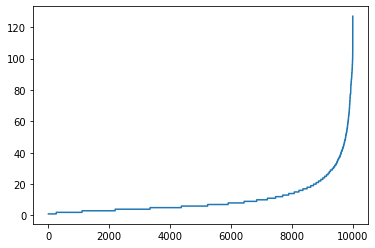

9135


In [ ]:
sentence_len = [len(sentence) for sentence in data_word]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

# 대부분이 30단어 이하로 구성되어있고 특히 25단어 이하인 문장의 수는 972개로 전체의 97%임
# 따라서 문장길이 기준을 25로 맞추어 이 이상은 생략, 이하는 패딩으로 길이를 맞춤 -> 임베딩 레이어에 넣을 준비 마침

리뷰의 최대 길이 : 127
리뷰의 평균 길이 : 10.5563


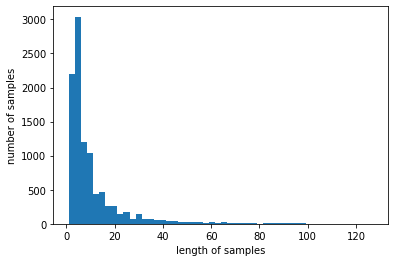

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in data_word))
print('리뷰의 평균 길이 :',sum(map(len, data_word))/len(data_word))
plt.hist([len(s) for s in data_word], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()